In [3]:
import mglearn

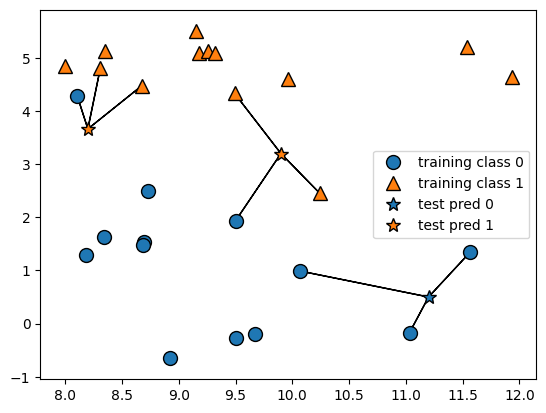

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
import mglearn.datasets

In [7]:
X, y = mglearn.datasets.make_forge()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X_train

array([[ 8.92229526, -0.63993225],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [ 7.99815287,  4.8525051 ],
       [11.0329545 , -0.16816717],
       [ 9.17748385,  5.09283177],
       [11.563957  ,  1.3389402 ],
       [ 9.15072323,  5.49832246],
       [ 8.34810316,  5.13415623],
       [11.93027136,  4.64866327],
       [ 8.1062269 ,  4.28695977],
       [ 8.67494727,  4.47573059],
       [ 9.67284681, -0.20283165],
       [ 9.50169345,  1.93824624],
       [ 8.69289001,  1.54322016],
       [ 9.96346605,  4.59676542],
       [ 9.50048972, -0.26430318],
       [ 9.25694192,  5.13284858],
       [ 8.68937095,  1.48709629]])

In [16]:
knc = KNeighborsClassifier(n_neighbors=3)

In [17]:
knc.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knc.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [19]:
knc.score(X_test, y_test)

0.8571428571428571

In [21]:
from matplotlib import pyplot as plt

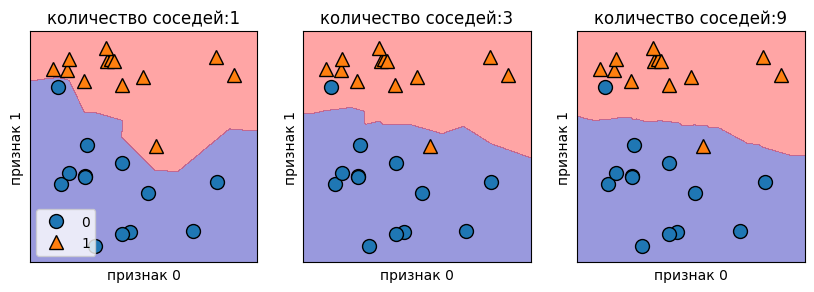

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
# создаем объект-классификатор и подгоняем в одной строке
 clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("количество соседей:{}".format(n_neighbors))
 ax.set_xlabel("признак 0")
 ax.set_ylabel("признак 1")
axes[0].legend(loc=3)


<function matplotlib.pyplot.legend(*args, **kwargs)>

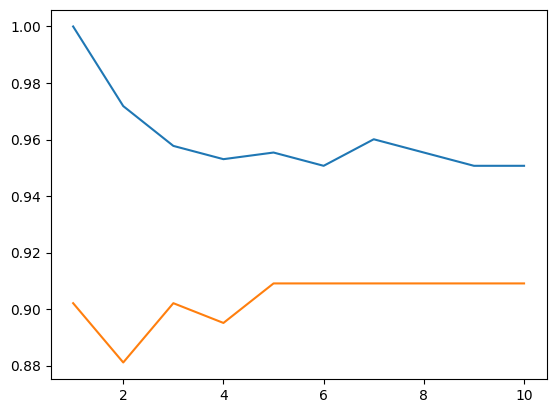

In [26]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

training_accuracy = []
test_accuracy = []

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(range(1, 11), training_accuracy)
plt.plot(range(1, 11), test_accuracy)
plt.legend

In [27]:
#Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor

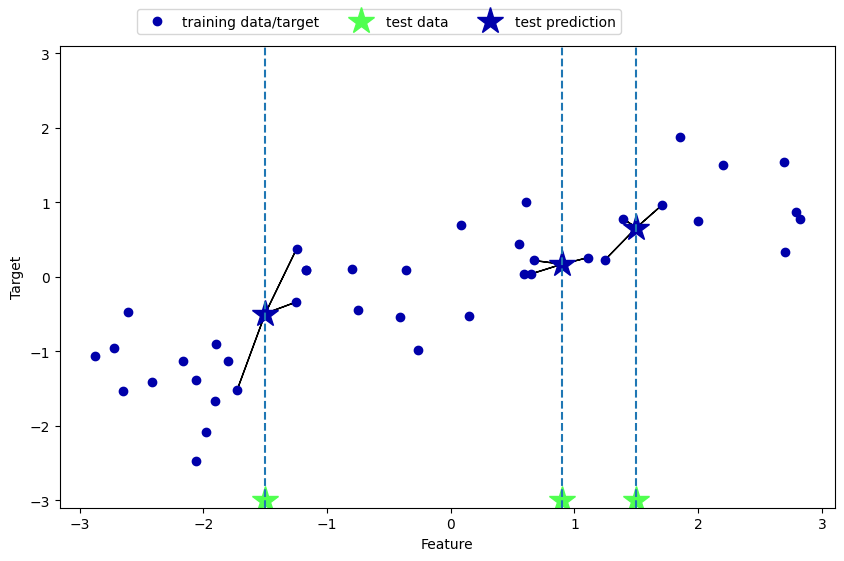

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [34]:
X, y = mglearn.datasets.make_wave()
X_train, X_test, y_train, y_test = train_test_split(X, y)

<function matplotlib.pyplot.legend(*args, **kwargs)>

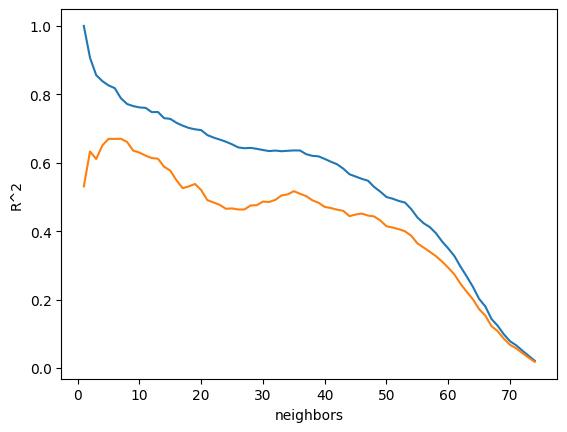

In [42]:
training_accuracy = []
test_accuracy = []

for i in range(1, 75):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train, y_train)
    training_accuracy.append(knr.score(X_train, y_train))
    test_accuracy.append(knr.score(X_test, y_test))
plt.plot(range(1, 75), training_accuracy)
plt.plot(range(1, 75), test_accuracy)
plt.xlabel('neighbors')
plt.ylabel('R^2')
plt.legend

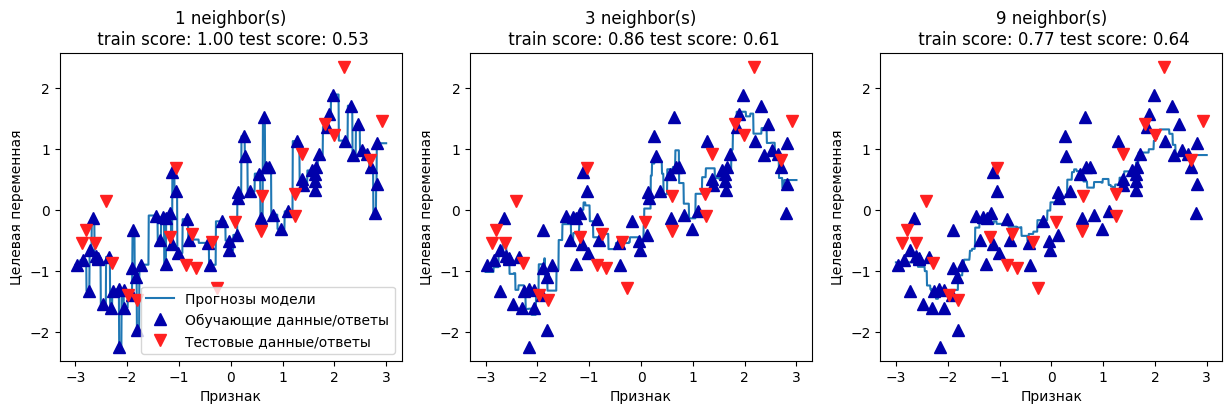

In [47]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # получаем прогнозы, используя 1, 3, и 9 соседей
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Признак")
 ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
 "Тестовые данные/ответы"], loc="best")

В принципе, в классификаторе KNeighbors есть два важных параметра:
количество соседей и мера расстояния между точками данных. На
практике использование небольшого числа соседей (например, 3-5) часто
работает хорошо, но вы, конечно, можете самостоятельно настроить этот
параметр. Вопрос, связанный с выбором правильной меры расстояния,
выходит за рамки этой книги. По умолчанию используется евклидово
расстояние, которое хорошо работает во многих ситуациях.
Одним из преимуществ метода ближайших соседей является то, что
эту модель очень легко интерпретировать и, как правило, этот метод дает
приемлемое качество без необходимости использования большого
количества настроек. Он является хорошим базовым алгоритмом,
который нужно попробовать в первую очередь, прежде чем
рассматривать более сложные методы. Как правило, построение модели
ближайших соседей происходит очень быстро, но, когда ваш обучающий
набор очень большой (с точки зрения количества характеристик или
количества наблюдений) получение прогнозов может занять некоторое
время. При использовании алгоритма ближайших соседей важно
выполнить предварительную обработку данных (смотрите главу 3).
Данный метод не так хорошо работает, когда речь идет о наборах данных
с большим количеством признаков (сотни и более), и особенно плохо
работает в ситуации, когда подавляющее число признаков в большей
части наблюдений имеют нулевые значения (так называемые
разреженные наборы данных или sparse datasets).
Таким образом, несмотря на то что алгоритм ближайших соседей
легко интерпретировать, на практике он не часто используется из-за
скорости вычислений и его неспособности обрабатывать большое
количество признаков.